## this notebook invokes VehicleProcess to detect objects(vehicles) in images

In [1]:
import glob
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from object_finder import ObjectProcess
from image_features import *
from IPython.display import HTML

## 1. Different sliding window search areas
Code allows the definition of multiple search areas, each with different stride, size, and padding. Each search area can be processed in a different thread to improve performance. The image below shows the used search areas. 

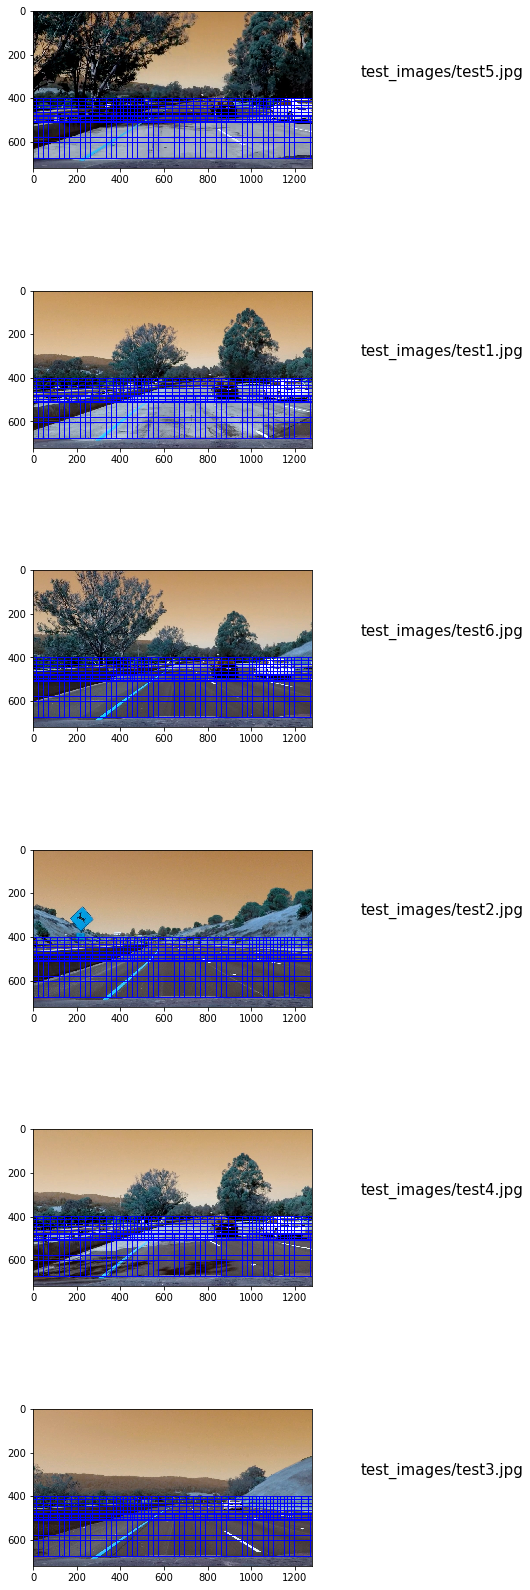

In [2]:
images = glob.glob('test_images/test*.jpg')

total_images = 6
plt.figure(figsize=(5,30))

for i, image in enumerate(images):

    img = cv2.imread(image)
    vehicles_detector = ObjectProcess()
    sliding_window_img = vehicles_detector.process_frame(img, show_sliding_windows=True)

    plt.subplot(total_images,1,i+1)
    plt.imshow(sliding_window_img)
    plt.text(1500,300,image,fontsize=15)

plt.show()

## 2. Object/Vehicle Detection stage

Following images show all the positive predicted objects as returned by the our trained SVM classifier model on the sliding window image patch. As seen, there are some false positives. 

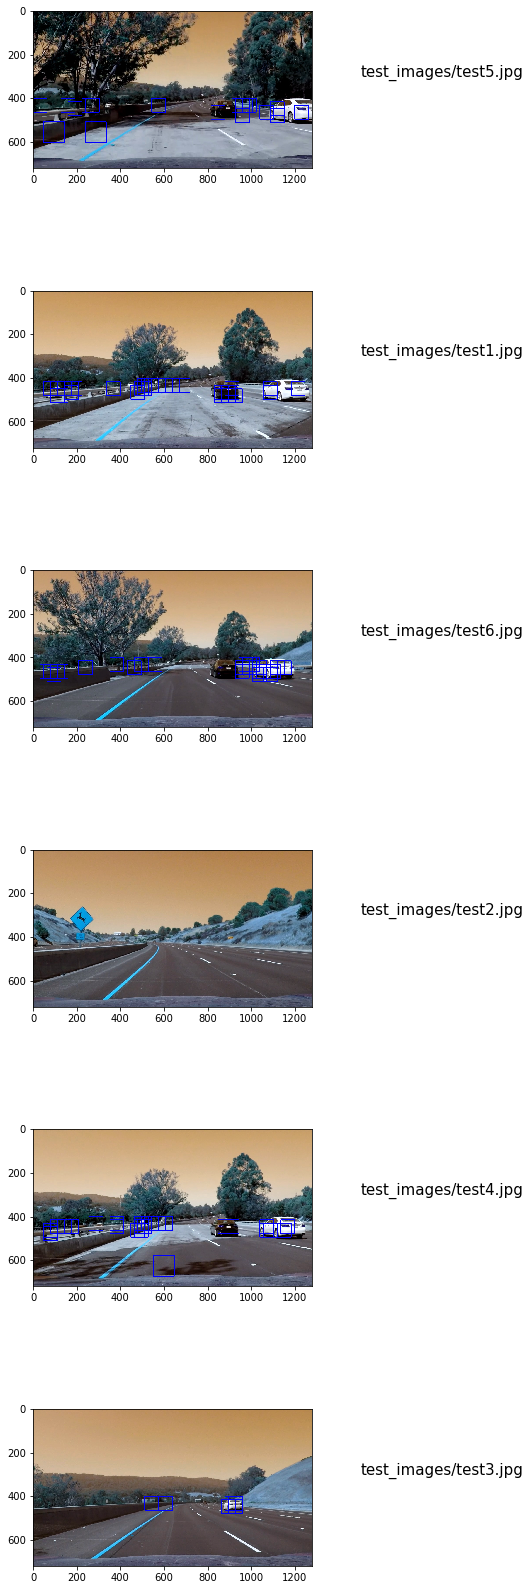

In [3]:
images = glob.glob('test_images/test*.jpg')

total_images = 6
plt.figure(figsize=(5,30))

for i, image in enumerate(images):

    img = cv2.imread(image)
    vehicles_detector = ObjectProcess()
    sliding_window_img = vehicles_detector.process_frame(img, show_objects=True)

    plt.subplot(total_images,1,i+1)
    plt.imshow(sliding_window_img)
    plt.text(1500,300,image,fontsize=15)

plt.show()

## 3.Heatmap 

For each positive prediction, the value of the decision function is added onto a heatmap in the area of the bounding box. When processing a video the heatmap is averaged over 8 frames to smoothen resulting bounding boxes. To remove false positives the heatmap is then thresholded

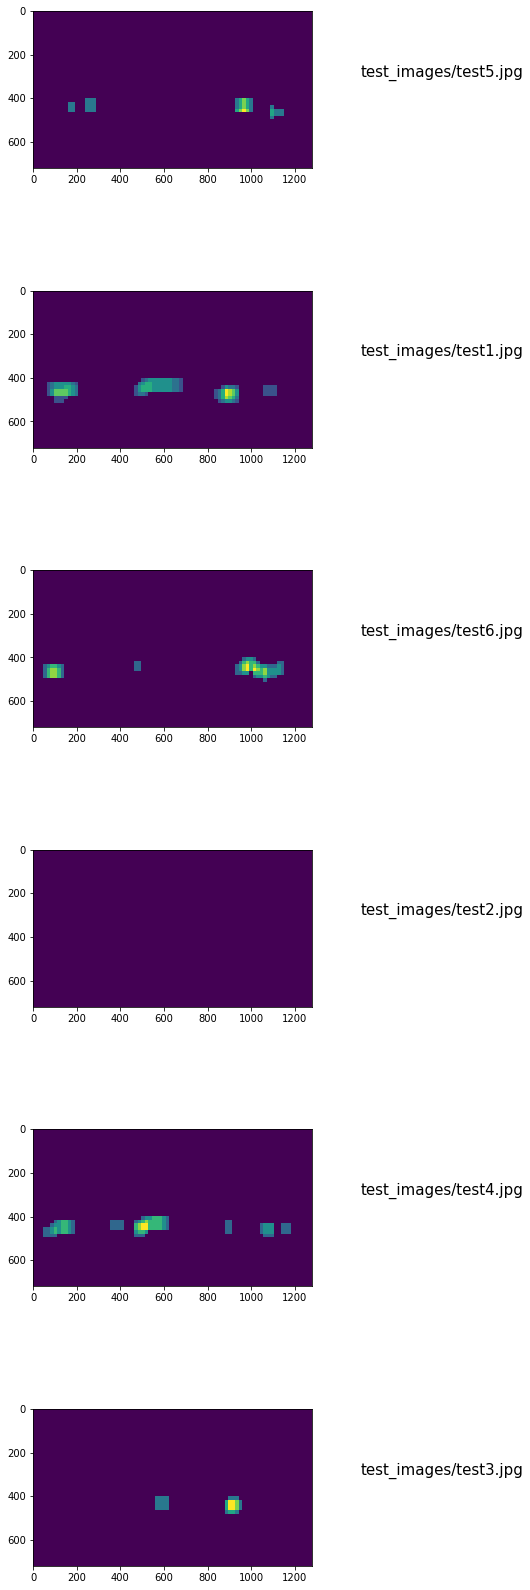

In [4]:
images = glob.glob('test_images/test*.jpg')

total_images = 6
plt.figure(figsize=(5,30))

for i, image in enumerate(images):

    img = cv2.imread(image)
    vehicles_detector = ObjectProcess()
    sliding_window_img = vehicles_detector.process_frame(img, show_heatmap=True)

    plt.subplot(total_images,1,i+1)
    plt.imshow(sliding_window_img)
    plt.text(1500,300,image,fontsize=15)

plt.show()

## 4. Aggregate and show contours

There are multiple ways of generating bounding boxes out of a heat map. I used scipy.label() function to draw contours around the positive detection in the heatmap image.

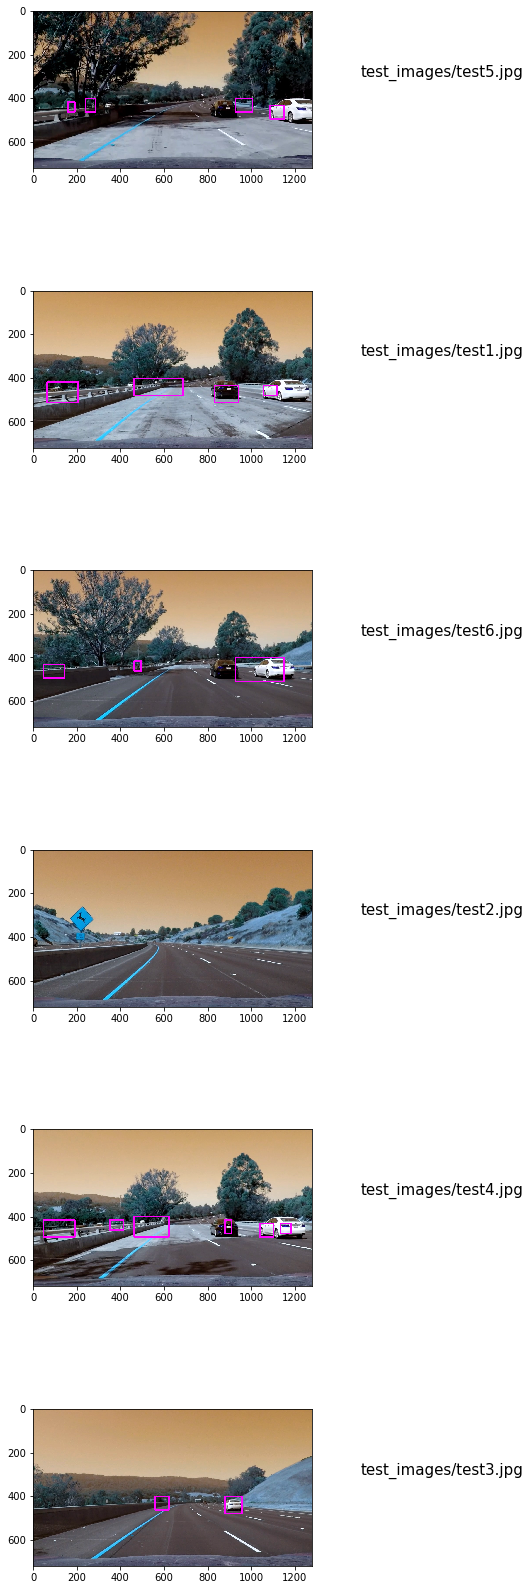

In [ ]:
images = glob.glob('test_images/test*.jpg')

total_images = 6
plt.figure(figsize=(5,30))

for i, image in enumerate(images):

    img = cv2.imread(image)
    vehicles_detector = ObjectProcess()
    sliding_window_img = vehicles_detector.process_frame(img, show_contours=True)

    plt.subplot(total_images,1,i+1)
    plt.imshow(sliding_window_img)
    plt.text(1500,300,image,fontsize=15)

plt.show()

## 5. Final Video processing

I recorded the positions of positive detections in each frame of the video. From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions. I then used blob detection in Sci-kit Image to identify individual blobs in the heatmap. I then assumed each blob corresponded to a vehicle. I constructed bounding boxes to cover the area of each blob detected.

In [2]:
from moviepy.video.io.VideoFileClip import VideoFileClip

vehicles_detector = ObjectProcess()
input_video = 'project_video.mp4'
output_video = input_video[:-4] + '_with_vehicles_detected.mp4'

video_clip = VideoFileClip(input_video)
processed_clip = video_clip.fl_image(vehicles_detector.process_frame)

# write video
processed_clip.write_videofile(output_video, audio=False)  
print('Done')

[MoviePy] >>>> Building video project_video_with_vehicles_detected.mp4
[MoviePy] Writing video project_video_with_vehicles_detected.mp4


100%|█████████▉| 1260/1261 [1:07:27<00:03,  3.19s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_with_vehicles_detected.mp4 

Done


## Final processed video

In [3]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))